# Exercise: Cherry Blossoms!

#### Summary

Once upon a time it was サクラ season, which meant the [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! This year they bloomed a little early and they've long sinced faded, so for today we'll stick with data-driven blossoms: http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/

#### Data Source(s)

Historical Series of Phenological data for Cherry Tree Flowering at Kyoto City
(and March Mean Temperature Reconstructions), http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/

#### Files

- KyotoFullFlower7.xls, "Full-flowering Dates of Prunus jamasakura in Kyoto City"

#### Skills

- Working with Excel files
- Ignoring the first few rows
- Replacing NaN values
- Counting and summarizing columns
- Replacing non-NaN values
- Extracting with strings
- Rolling means

# Read in `KyotoFullFlower7.xls`

Be sure to look at the first five rows.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_excel('KyotoFullFlower7.xls')
df.head()

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


### That... doesn't look right. Why not? 

Examine your column names, and maybe even open up the file in Excel.

In [3]:
# These lines are explanations, not data

### Read in the file correctly, and look at the first five rows

- TIP: The first year should be 801 AD, and it should not have any dates or anything.

In [4]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25)
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


### Look at the final five rows of the data

In [5]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## Watching out for NaN values

Take a look at **Reference name**. Is there something you should set to be `NaN`? Use either of the two ways we have covered.

In [6]:
df.loc[df['Reference Name'] == '-', 'Reference Name'] = np.nan
df.head(20)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN
5,806,NaN,NaN,NaN,NaN,NaN
6,807,NaN,NaN,NaN,NaN,NaN
7,808,NaN,NaN,NaN,NaN,NaN
8,809,NaN,NaN,NaN,NaN,NaN
9,810,NaN,NaN,NaN,NaN,NaN


### Check that you have 827 values for "Full-flowering date (DOY)" and 825 for "Reference Name"

In [7]:
df['Full-flowering date (DOY)'].count()

827

In [8]:
df['Reference Name'].count()

825

# Cleaning up our data

## What sources are the most common as a reference?

In [9]:
df['Reference Name'].value_counts().head()

NEWS-PAPER(ARASHIYAMA)    94
SUGIURAKE-NIKKI           38
MYOHOIN-HINAMIKI          32
OYUDONONO-UENO-NIKKI      26
DAIGOJI-ZATSUYO           21
Name: Reference Name, dtype: int64

## Filter the list to only include rows that have a `Full-flowering date (DOY)`

In [10]:
df[df['Full-flowering date (DOY)'].notnull()]

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU


## Make a histogram of the full-flowering date.

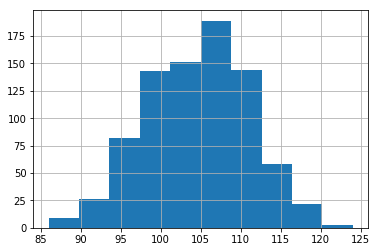

In [11]:
df['Full-flowering date (DOY)'].hist()

## Make another histogram of the full-flowering date, but with 39 bins instead of 10

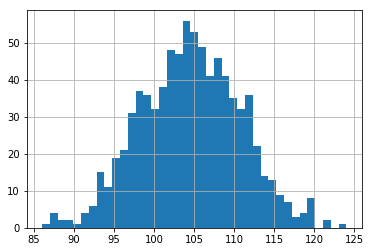

In [12]:
df['Full-flowering date (DOY)'].hist(bins=39)

## What's the average number of days it takes for the flowers to blossom? The max? Min? And how many records do we have?

Answer these with one line of code.

In [13]:
df['Full-flowering date (DOY)'].describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

## What's the average number of days into the year cherry flowers normally blossomed before 1900?

In [14]:
df[df['AD'] < 1990]['Full-flowering date (DOY)'].mean()

104.81897627965044

## How about after 1900?

In [15]:
df[df['AD'] > 1990]['Full-flowering date (DOY)'].mean()

96.280000000000001

## How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [16]:
df[df['Data type code'] == 4].head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU
94,895,104.0,414.0,5.0,4.0,NIHONKIRYAKU
95,896,104.0,413.0,5.0,4.0,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,5.0,4.0,SHUISHO


In [17]:
df[df['Data type code'] == 4]['AD'].count()

39

## Actually, that looks terrible. Replace the "Source code" and "data type code" columns with the values they stand for.

In [18]:
sources = {
    1: 'Reported by Taguchi (1939), J. Marine Meteorol. Soc. (Umi to Sora), 19, 217-227',
    2: 'Added by Sekiguchi (1969), Tokyo Geography Papers, 13, 175-190.',
    3: 'Added by Aono and Omoto (1994), J. Agric. Meteorol., 49, 263-272.',
    4: 'Added by Aono and Kazui (2008), Int. J. Climatol., 28, 905-914 (doi: 10.1002/joc.1594).',
    5: 'Cherry phenological data, Added by Aono and Saito (2010), Int. J. Biometeorol., 54, 211-219.',
    6: 'Added by Aono (2011), Time Studies, 4, 17-29. (in Japanese with English abstract)',
    7: 'Added by Aono (2012), Chikyu Kankyo, 17, 21-29. (in Japanese)',
    8: 'Found after the last publication of articles.'
}

datatypes = {
    0: 'data from modern times (full-bloom date since 1880s)',
    1: 'from diary description about full-bloom',
    2: 'from diary description about cherry blossom viewing party',
    3: 'from diary description about presents of cherry twigs from party participants',
    4: 'title in Japanese poety',
    8: 'Deduced from wisteria phenology, using the relation proposed by Aono and Saito (2010)',
    9: 'Deduced from Japanese kerria phenology, using the relation proposed by Aono (2011)'
}

In [19]:
df['source'] = df['Source code'].replace(sources)
df['datatype'] = df['Data type code'].replace(datatypes)
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,source,datatype
0,801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Show only the years where our data was from a title in Japanese poetry

In [20]:
df[df['datatype'] == 'title in Japanese poety']

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,source,datatype
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU,"Cherry phenological data, Added by Aono and Sa...",title in Japanese poety
94,895,104.0,414.0,5.0,4.0,NIHONKIRYAKU,"Cherry phenological data, Added by Aono and Sa...",title in Japanese poety
95,896,104.0,413.0,5.0,4.0,NIPPON-SANDAI-JITSUROKU,"Cherry phenological data, Added by Aono and Sa...",title in Japanese poety
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU,"Cherry phenological data, Added by Aono and Sa...",title in Japanese poety
154,955,89.0,330.0,5.0,4.0,SHUISHO,"Cherry phenological data, Added by Aono and Sa...",title in Japanese poety
168,969,98.0,408.0,5.0,4.0,NIHONKIRYAKU,"Cherry phenological data, Added by Aono and Sa...",title in Japanese poety
206,1007,106.0,416.0,5.0,4.0,MIDO-KAMPAKUKI,"Cherry phenological data, Added by Aono and Sa...",title in Japanese poety
232,1033,102.0,412.0,5.0,4.0,NIHONKIRYAKU,"Cherry phenological data, Added by Aono and Sa...",title in Japanese poety
235,1036,104.0,413.0,5.0,4.0,NIHONKIRYAKU,"Cherry phenological data, Added by Aono and Sa...",title in Japanese poety
259,1060,108.0,417.0,5.0,4.0,SHIN-SENZAI-WAKASHU,"Cherry phenological data, Added by Aono and Sa...",title in Japanese poety


## Graph the full-flowering date (DOY) over time

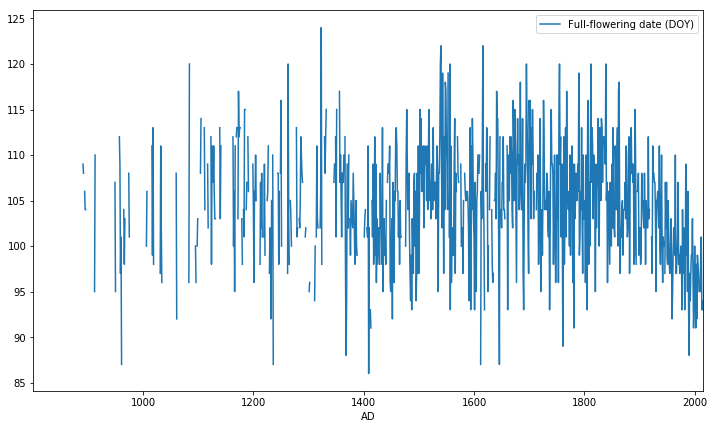

In [38]:
df.plot(x='AD', y='Full-flowering date (DOY)', figsize=(12, 7))

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [25]:
df.rolling(10, on='AD', min_periods=5).mean().tail()
# If this gives you an error you're using an old pandas version,
# so you can use df.set_index('AD').rolling(10, min_periods=5).mean().reset_index().tail()
# instead

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,source,datatype
1210,2011,95.9,405.7,5.3,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...
1211,2012,96.9,406.6,5.7,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...
1212,2013,96.4,406.1,6.1,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...
1213,2014,96.6,406.4,6.5,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...
1214,2015,96.0,405.8,6.9,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...


Adjust the code above to compute **and graph** a 20-year rolling average for the entire dataset.

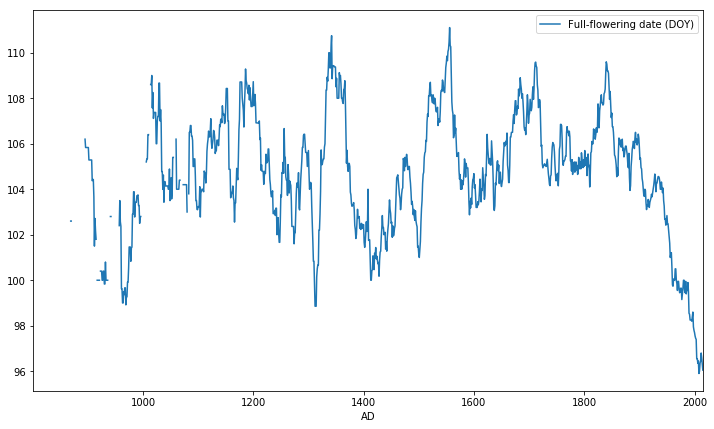

In [39]:
df.rolling(20, on='AD', min_periods=5).mean().plot(x='AD', y='Full-flowering date (DOY)', figsize=(12, 7))

# Adding a month column

### HOLD ON, time to learn something

**There are a few ways to do the next question**, but a couple popular methods will have pandas yell at you. You might want to try this new thing called `loc`! **It is used to update a column in a row based on a condition.**

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `df.country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

### Actually adding our column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

In [43]:
df['month'] = np.nan
df.loc[df['Full-flowering date'] < 600, 'month'] = 'May'
df.loc[df['Full-flowering date'] < 500, 'month'] = 'April'
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'

### Using your new column, how many blossomings happened in each month?

In [44]:
df['month'].value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### Graph how many blossomings happened in each month.

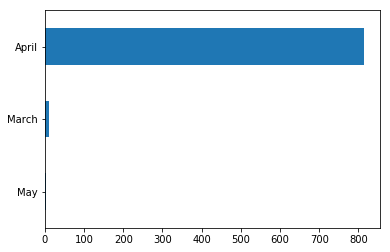

In [46]:
df['month'].value_counts().sort_values(ascending=True).plot(kind='barh')

## 19. Adding a day-of-month column

Now we're going to add a new column called **day-of-month** based on the full-flowering date.

- 402 means "April 2"
- 312 means "March 12"
- 511 means "May 11"

**We're only interested in the second part**. Previously I've had students convert them to integers to do this, but you know regular expressions!

- Tip: You won't be able to extract anything from a float, you'll need it to be a string
- Tip: There are two things that mean "talk about this column as a string," maybe you want me to talk about them?

In [52]:
df['day-of-month'] = np.nan
df['day-of-month'] = df['Full-flowering date'].astype(str).str.extract('\d(\d\d)', expand=False)
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,source,datatype,month,day-of-month
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...,April,09
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...,April,10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...,April,03
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...,April,04
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...,April,03


Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`. If should look like "April 09".

In [56]:
df['date'] = df['month'] + ' ' + df['day-of-month']
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,source,datatype,month,day-of-month,date
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...,April,09,April 09
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...,April,10,April 10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...,April,03,April 03
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...,April,04,April 04
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),Found after the last publication of articles.,data from modern times (full-bloom date since ...,April,03,April 03
